In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import font_manager

font_dirs = ['//Users/oscarb/Downloads/aptos-font', ]  # The directory containing your font file
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Aptos'
# plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 9 

In [5]:

import json

# Define a list of file paths to your JSON data
json_file_paths = [
    'umap_feature_map.table.json',
    'umap_feature_map_bad.json'
]

# Create an empty list to store DataFrames
dataframes = []

# Loop through each JSON file path
for json_file_path in json_file_paths:
    # Load the JSON data from the file
    with open(json_file_path, 'r') as json_file:
        json_data = json.load(json_file)

    # Extract the 'data' and 'columns' from the JSON data
    data = json_data.get('data', [])
    columns = json_data.get('columns', [])

    # Create a Pandas DataFrame for the current JSON file
    df = pd.DataFrame(data, columns=columns)

    # Append the DataFrame to the list
    dataframes.append(df)

# Now, 'dataframes' is a list containing DataFrames for each JSON file
# You can access each DataFrame by its index, for example, dataframes[0] is the first DataFrame


/var/folders/13/__pnhh1j11d7t5c39gxw6j5m0000gn/T/ipykernel_80103/1605552989.py:36: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend_legendHandles = legend.legendHandles


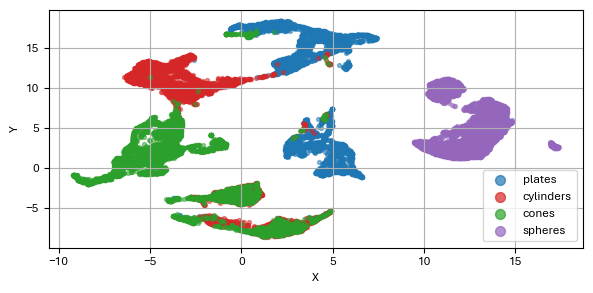

In [10]:

import seaborn as sns

def plot_data_by_label(data, title, label_colors=None):
    plt.figure(figsize=(6, 3))

    # Get unique labels from the 'label' column
    unique_labels = data['label'].unique()

    data['label'] = data['label'].replace({'circular_plates': 'plates', 'stretched_cone': 'tall cones'})

    default_colors = sns.color_palette("tab10")
    # default_colors = ['#003f5c', '#58508d', '#bc5090', '#ff6361', '#ffa600', 'k', 'k']

    default_colors[1], default_colors[3] = default_colors[3], default_colors[1] 
    
    default_colors[4], default_colors[3] = default_colors[3], default_colors[4] 
    
    # Set the transparency level
    alpha_value = 0.5
    
    # Use label_colors if provided, else use the default colors
    colors = label_colors if label_colors is not None else default_colors

    for i, label in enumerate(unique_labels):
        label_data = data[(data['label'].replace('circular_plates', 'plates').replace('stretched_cone', 'tall cones')) == label]

        # Use a dotted style for the plot ('o' marker with line style '')
        #plt.plot(label_data['x'], label_data['y'], 'o', linestyle='', label=f'{label}', color=colors[i % len(colors)], alpha=alpha_value, rasterized=True)

        plt.scatter(label_data['x'], label_data['y'], s=8, label=f'{label}', color=colors[i % len(colors)], alpha=alpha_value, rasterized=True)

    plt.xlabel('X')
    plt.ylabel('Y')
    legend = plt.legend(loc='lower right')
    # Increase dot size only for the legend
    legend_legendHandles = legend.legendHandles
    for handle in legend_legendHandles:
        handle.set_sizes([50])
        handle.set_alpha([0.7])
    plt.grid(True)
    # Adjusting plot aesthetics
    plt.tight_layout()
    #plt.title(title)  # Add title
    plt.savefig(f'/Users/oscarb/Downloads/raster_{title}1.pdf', format='pdf')
    plt.show()

# Assuming dataframes[0] and dataframes[1] are defined elsewhere
plot_data_by_label(dataframes[0], 'tight_umap')
#plot_data_by_label(dataframes[1], 'tight_umap_bad_samples')